## Final Project Submission

Please fill out: 
* Student name:                                            Sean Conlon 
* Student pace:                                            Full Time
* Scheduled project review date/time:                      Jan 27, 2023
* Instructor name:                                         Angelica Spratley
* Blog post URL:                                           https://medium.com/@conlons628


Import all necessary libraries needed for EDA of master dataset

In [15]:
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [16]:
#Read csv file of master dataset along with information about data we are working with

master = pd.read_csv('masterdataset.csv')
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1459 non-null   int64  
 1   id                 1459 non-null   int64  
 2   release_date       1459 non-null   object 
 3   movie              1459 non-null   object 
 4   production_budget  1459 non-null   object 
 5   domestic_gross     1459 non-null   object 
 6   worldwide_gross    1459 non-null   object 
 7   year               1459 non-null   int64  
 8   movie_id           1459 non-null   object 
 9   original_title     1459 non-null   object 
 10  runtime_minutes    1459 non-null   float64
 11  genres             1459 non-null   object 
 12  averagerating      1459 non-null   float64
 13  numvotes           1459 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 159.7+ KB


Will start with expanding on certain columns to get an idea of the master dataset

In [17]:
# Expanding on column of number of votes for each movie

master['numvotes']

0       447624.0
1        24451.0
2       665594.0
3       670926.0
4       329135.0
          ...   
1454        13.0
1455      5156.0
1456        82.0
1457       127.0
1458        85.0
Name: numvotes, Length: 1459, dtype: float64

In [18]:
#Checking the number of values within the column genres

master['genres'].value_counts()

Adventure,Animation,Comedy     67
Comedy                         53
Action,Adventure,Sci-Fi        52
Comedy,Drama,Romance           51
Drama                          50
                               ..
Comedy,Sport                    1
Action,Fantasy,Western          1
Western                         1
Action,Biography,Comedy         1
Biography,Documentary,Music     1
Name: genres, Length: 226, dtype: int64

In [19]:
#Expanding on the worldwide grossing column

master['worldwide_gross']

0       $1,045,663,875
1         $149,762,350
2       $1,403,013,963
3       $2,048,134,200
4         $655,945,209
             ...      
1454            $3,547
1455          $489,792
1456                $0
1457                $0
1458                $0
Name: worldwide_gross, Length: 1459, dtype: object

The following cells adapt the worldwide_gross and production_budget columns to make it into an integer. 

This is accomplished by deleting the ',' delimiters and ensuring that the data can now be manipulated. 



In [20]:
master['worldwide_gross'] = master['worldwide_gross'].str[1:]

In [21]:
master['worldwide_gross'] = master['worldwide_gross'].str.replace(',','')

In [22]:
master['worldwide_gross'] = master['worldwide_gross'].astype(int)

In [23]:
master['production_budget'] = master['production_budget'].str[1:]

In [24]:
master['production_budget'] = master['production_budget'].str.replace(',','')

In [25]:
master['production_budget'] = master['production_budget'].astype(int)

In [26]:
# Create a profit column that subtracts the new worldwide integer and the production budget integer

master['profit'] = master['worldwide_gross'] - master['production_budget']

In [27]:
#Sort the values in profit column to see highest amount at the top

master.sort_values('profit',ascending=False)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit
3,3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1748134200
23,23,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,2015,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1433854864
45,46,67,"Apr 3, 2015",Furious 7,190000000,"$353,007,020",1518722794,2015,tt2820852,Furious Seven,137.0,"Action,Crime,Thriller",7.2,335074.0,1328722794
18,18,27,"May 4, 2012",The Avengers,225000000,"$623,279,547",1517935897,2012,tt0848228,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1292935897
27,27,42,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224,2018,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1148258224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,255,79,"Nov 24, 2010",The Nutcracker in 3D,90000000,"$195,459",20466016,2010,tt1041804,The Nutcracker in 3D,110.0,"Action,Family,Fantasy",4.3,3119.0,-69533984
241,253,78,"Apr 21, 2017",The Promise,90000000,"$8,224,288",10551417,2017,tt7232438,Puen Tee Raluek,114.0,"Drama,Horror,Thriller",6.1,629.0,-79448583
243,256,80,"Dec 13, 2017",Bright,90000000,$0,0,2017,tt5519340,Bright,117.0,"Action,Crime,Fantasy",6.4,147834.0,-90000000
122,124,94,"Mar 11, 2011",Mars Needs Moms,150000000,"$21,392,758",39549758,2011,tt1305591,Mars Needs Moms,88.0,"Adventure,Animation,Family",5.4,19823.0,-110450242


ROI = Net income / Cost of investment x 100

In [28]:
#Creates new column of ROI (Return on Investment)

master['ROI'] = master['profit'] / master['production_budget'] * 100

In [29]:
#Sort by values within ROI column to see the highest amount at the top

master.sort_values('ROI',ascending=False)[0:50]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI
1436,1521,80,"Jul 10, 2015",The Gallows,100000,"$22,764,410",41656474,2015,tt2309260,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763.0,41556474,41556.474000
1349,1423,12,"Jan 6, 2012",The Devil Inside,1000000,"$53,262,945",101759490,2012,tt1560985,The Devil Inside,83.0,Horror,4.2,33522.0,100759490,10075.949000
1237,1303,65,"Oct 20, 2010",Paranormal Activity 2,3000000,"$84,752,907",177512032,2010,tt1536044,Paranormal Activity 2,91.0,Horror,5.7,93122.0,174512032,5817.067733
1151,1208,49,"Feb 24, 2017",Get Out,5000000,"$176,040,665",255367951,2017,tt5052448,Get Out,104.0,"Horror,Mystery,Thriller",7.7,400474.0,250367951,5007.359020
1325,1398,64,"Oct 21, 2016",Moonlight,1500000,"$27,854,931",65245512,2016,tt4975722,Moonlight,111.0,Drama,7.4,227964.0,63745512,4249.700800
1350,1424,18,"May 25, 2012",Chernobyl Diaries,1000000,"$18,119,640",42411721,2012,tt1991245,Chernobyl Diaries,86.0,"Horror,Mystery,Thriller",5.0,60304.0,41411721,4141.172100
1152,1209,51,"Oct 21, 2011",Paranormal Activity 3,5000000,"$104,028,807",207039844,2011,tt1778304,Paranormal Activity 3,83.0,"Horror,Mystery,Thriller",5.8,85689.0,202039844,4040.796880
1126,1182,84,"Oct 3, 2014",Annabelle,6500000,"$84,273,813",256862920,2014,tt3322940,Annabelle,99.0,"Horror,Mystery,Thriller",5.4,122039.0,250362920,3851.737231
1316,1389,15,"Aug 27, 2010",The Last Exorcism,1800000,"$41,034,350",70165900,2010,tt1320244,The Last Exorcism,87.0,"Drama,Horror,Thriller",5.6,45815.0,68365900,3798.105556
1062,1116,56,"Dec 21, 2016",Dangal,9500000,"$12,391,761",294654618,2016,tt5074352,Dangal,161.0,"Action,Biography,Drama",8.5,123638.0,285154618,3001.627558


Will now change certain parameters of columns to further break down the analysis




In [30]:
#Update the runtime to only show movies over 75minutes long

master = master[master['runtime_minutes'] >= 75.0]

In [31]:
#Update the production_budget to limit over $10million

master = master[master['production_budget'] >= 10000000]

In [32]:
#Update the number of votes to be over 1000 votes

master = master[master['numvotes'] >= 1000]

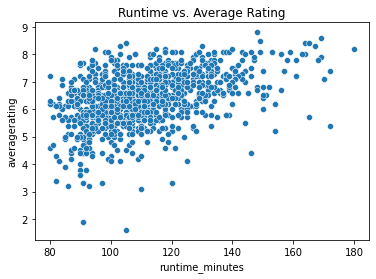

In [33]:
#Plotting runtime vs average rating to see best possible runtime

sns.scatterplot(x='runtime_minutes', y='averagerating', data=master)
plt.title('Runtime vs. Average Rating')
plt.show()



In [34]:
#Checking the ROIs

master['ROI'].describe()

count    1050.000000
mean      213.573901
std       310.786432
min      -100.000000
25%        19.899827
50%       137.007215
75%       300.122751
max      2459.723617
Name: ROI, dtype: float64

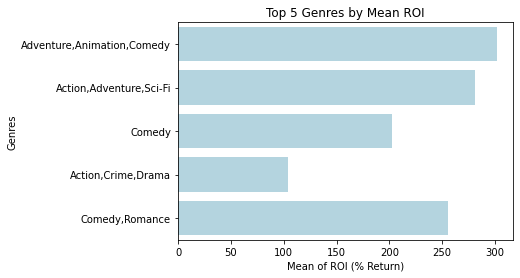

In [35]:
# Group data by genre and by mean of ROI
mean_ROI_by_genre = master.groupby('genres')['ROI'].mean()

#Get top 5 genres based on mean ROI
top_5_genres = top_5_genres = master['genres'].value_counts().head()

# Create a bar chart of the mean ROI by genre
sns.barplot(x=mean_ROI_by_genre.loc[top_5_genres.index], y=top_5_genres.index, color= 'lightblue')
plt.title('Top 5 Genres by Mean ROI')
plt.ylabel('Genres')
plt.xlabel('Mean of ROI (% Return)')
plt.show()



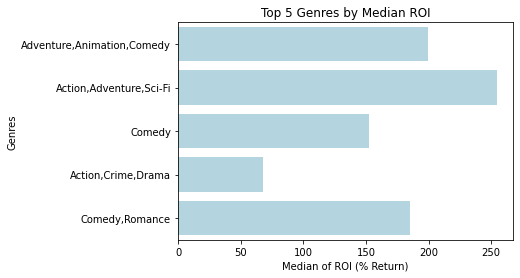

In [36]:
# Group the data by genre and median of ROI
median_ROI_by_genre = master.groupby('genres')['ROI'].median()

# Get the top 5 genres based on median ROI
top_5_genres_median = master['genres'].value_counts().head()

# Create a bar chart of the top 5 genres based on median ROI
sns.barplot(x=median_ROI_by_genre.loc[top_5_genres_median.index], y=top_5_genres_median.index, color= 'lightblue')
plt.title('Top 5 Genres by Median ROI')
plt.ylabel('Genres')
plt.xlabel('Median of ROI (% Return)')
plt.show()


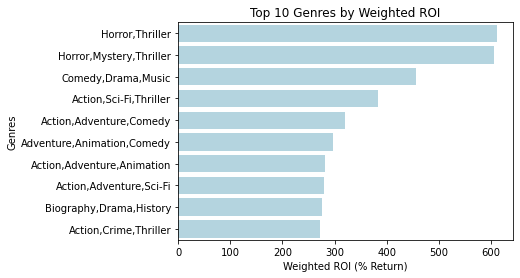

In [37]:
#Adjust genre_count to only include greater than 5 from genres
genre_counts = master['genres'].value_counts()
filtered_genres = genre_counts[genre_counts > 5].index

master = master[master['genres'].isin(filtered_genres)]

#Grouped data by genre as well as calculated the sum of profit and production budget
profit_by_genre = master.groupby('genres')['profit'].sum()
budget_by_genre = master.groupby('genres')['production_budget'].sum()

#Weighted ROI
weighted_roi = profit_by_genre/budget_by_genre

#Top 10 genres from weighted ROI
top_10_genres = weighted_roi.nlargest(10)

#Create barchart of top 10 genres by Weighted ROI
sns.barplot(x=top_10_genres * 100, y=top_10_genres.index, color='lightblue')
plt.title('Top 10 Genres by Weighted ROI')
plt.ylabel('Genres')
plt.xlabel('Weighted ROI (% Return)')

#Saves plot of graph to new file location in Folder
plt.savefig("Graphs/Top10_Genre_Weighted_ROI.jpeg", bbox_inches = 'tight')

plt.show()

In [38]:
#Checking sum divided by sum of multiple columns to check ROI

master.loc[master['genres']== 'Horror,Thriller']['profit'].sum() / master.loc[master['genres']== 'Horror,Thriller']['production_budget'].sum()



6.1149335238095235

In [39]:
weighted_roi.nlargest(20)


genres
Horror,Thriller               6.114934
Horror,Mystery,Thriller       6.063774
Comedy,Drama,Music            4.564660
Action,Sci-Fi,Thriller        3.837065
Action,Adventure,Comedy       3.204742
Adventure,Animation,Comedy    2.965111
Action,Adventure,Animation    2.810570
Action,Adventure,Sci-Fi       2.799661
Biography,Drama,History       2.763414
Action,Crime,Thriller         2.714384
Comedy,Crime                  2.640921
Crime,Drama                   2.508748
Action,Biography,Drama        2.476173
Drama,Romance                 2.456404
Comedy,Romance                2.280376
Adventure,Comedy              2.261323
Biography,Drama,Thriller      2.251779
Biography,Drama               2.150229
Action,Thriller               2.131787
Action,Adventure,Thriller     2.096554
dtype: float64

In [43]:
#Checking runtime minutes min and max

master['runtime_minutes'].describe()

count    765.000000
mean     111.330719
std       16.641875
min       80.000000
25%       99.000000
50%      109.000000
75%      122.000000
max      180.000000
Name: runtime_minutes, dtype: float64

In [44]:
#Creating a bin for plotting runtime_minutes

master['runtimes_bins'] = pd.cut(master['runtime_minutes'], [75,90,105,120,135,150,165,180])

In [45]:
#Checking the bin creation was successful

master['runtimes_bins']

0       (135, 150]
1       (105, 120]
2       (135, 150]
3       (135, 150]
4       (105, 120]
           ...    
1053     (90, 105]
1054    (105, 120]
1055     (90, 105]
1058     (90, 105]
1059     (90, 105]
Name: runtimes_bins, Length: 765, dtype: category
Categories (7, interval[int64]): [(75, 90] < (90, 105] < (105, 120] < (120, 135] < (135, 150] < (150, 165] < (165, 180]]

Bar Graphs of Mean and Median ROI by Runtime

In [46]:
master['ROI'].mean()

220.13557750902982

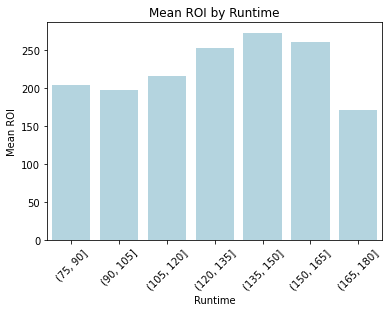

In [47]:
#Grouped data by runtime and mean of ROI 
mean_ROI_by_runtime_bin = master.groupby('runtimes_bins')['ROI'].mean()

#Create barchart of mean ROI by runtime
sns.barplot(x= mean_ROI_by_runtime_bin.index ,y= mean_ROI_by_runtime_bin, color='lightblue')
plt.ylabel('Mean ROI')
plt.xlabel('Runtime')
plt.title('Mean ROI by Runtime')
plt.xticks(rotation=45)

#Saves plot of graph to new file location in Folder
plt.savefig("Graphs/Mean_ROI_Runtime.jpeg", bbox_inches = 'tight')

plt.show()



In [49]:
master['ROI'].median()

145.34372

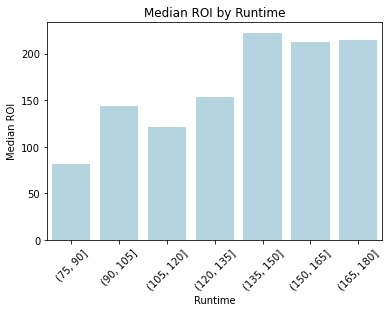

In [48]:
#Grouped data by runtime and median of ROI
median_ROI_by_runtime_bin = master.groupby('runtimes_bins')['ROI'].median()

#Create barchart of median ROI by runtime
sns.barplot(x= median_ROI_by_runtime_bin.index ,y= median_ROI_by_runtime_bin, color='lightblue')
plt.xlabel('Runtime')
plt.ylabel('Median ROI')
plt.title('Median ROI by Runtime')
plt.xticks(rotation=45)
plt.show()


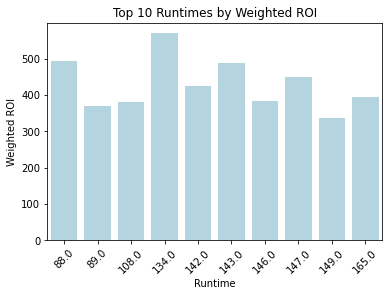

In [50]:
#Grouped data by runtime as well as calculated the sum of profit and production budget
profit_by_runtime = master.groupby('runtime_minutes')['profit'].sum()
budget_by_runtime = master.groupby('runtime_minutes')['production_budget'].sum()

#Weighted ROI
weighted_roi = profit_by_runtime/budget_by_runtime


#Top 10 runtimes from weighted ROI
top_10_runtime = weighted_roi.nlargest(10)


#Create barchart of top 10 runtimes by Weighted ROI
sns.barplot(x=top_10_runtime.index, y=top_10_runtime.sort_values()*100, color='lightblue')
plt.title('Top 10 Runtimes by Weighted ROI')
plt.xlabel('Runtime')
plt.ylabel('Weighted ROI')
plt.xticks(rotation=45)
plt.show()


In [109]:
#Creating a bin for plotting average rating

master['averagerating_bin'] = pd.cut(master['averagerating'], [3,4,5,6,7,8,9])

In [110]:
master['averagerating_bin']

0       (6, 7]
1       (5, 6]
2       (7, 8]
3       (8, 9]
4       (6, 7]
         ...  
1053    (6, 7]
1054    (5, 6]
1055    (6, 7]
1058    (5, 6]
1059    (5, 6]
Name: averagerating_bin, Length: 765, dtype: category
Categories (6, interval[int64]): [(3, 4] < (4, 5] < (5, 6] < (6, 7] < (7, 8] < (8, 9]]

Graphs of Mean and Median ROI by Rating

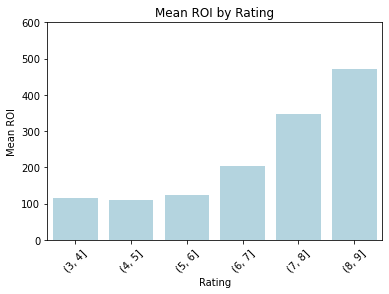

In [146]:
#Grouped data by rating and mean of ROI
mean_ROI_by_rating_bin = master.groupby('averagerating_bin')['ROI'].mean()

#Create barchart of mean ratings
sns.barplot(x= mean_ROI_by_rating_bin.index, y= mean_ROI_by_rating_bin, color='lightblue')
plt.ylim(0, 600)
plt.xlabel('Rating')
plt.ylabel('Mean ROI')
plt.title('Mean ROI by Rating')
plt.xticks(rotation=45)

#Saves plot of graph to new file location in Folder
plt.savefig("Graphs/Mean_ROI_Rating.jpeg", bbox_inches = 'tight')

plt.show()

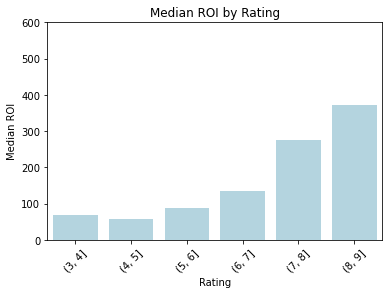

In [147]:
#Grouped data by rating and median of ROI
median_ROI_by_rating_bin = master.groupby('averagerating_bin')['ROI'].median()

##Create barchart of median ratings
sns.barplot(x= median_ROI_by_rating_bin.index, y= median_ROI_by_rating_bin, color='lightblue')
plt.ylim(0, 600)
plt.xlabel('Rating')
plt.ylabel('Median ROI')
plt.title('Median ROI by Rating')
plt.xticks(rotation=45)
plt.show()



In [122]:
master['averagerating'].describe()

count    765.000000
mean       6.426275
std        0.929069
min        3.200000
25%        5.900000
50%        6.500000
75%        7.100000
max        8.800000
Name: averagerating, dtype: float64

In [108]:
master['rating'].value_counts()

(6.56, 7.12]     179
(6.0, 6.56]      175
(5.44, 6.0]      128
(7.12, 7.68]     111
(4.88, 5.44]      65
(7.68, 8.24]      59
(4.32, 4.88]      25
(3.76, 4.32]      10
(3.194, 3.76]      7
(8.24, 8.8]        6
Name: rating, dtype: int64

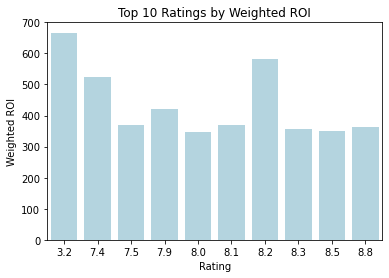

In [148]:
#Grouped data by rating as well as calculated the sum of profit and production budget
profit_by_rating = master.groupby('averagerating')['profit'].sum()
budget_by_rating = master.groupby('averagerating')['production_budget'].sum()

#Weighted ROI formula
weighted_roi = profit_by_rating/budget_by_rating


#Top 10 ratings from Weighted ROI
top_10_rating = weighted_roi.nlargest(10)


#Create barchart of top 10 genres by Weighted ROI
sns.barplot(x=top_10_rating.index, y=top_10_rating.sort_values()*100, color='lightblue')
plt.ylim(0, 700)
plt.title('Top 10 Ratings by Weighted ROI')
plt.xlabel('Rating')
plt.ylabel('Weighted ROI')
plt.show()


In [38]:
#Checking head of table before continuing 

master.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI,runtime_bins,rating
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0,635063875,154.667286,135.0,"(6.56, 7.12]"
1,1,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,-200237650,-57.210757,115.0,"(5.44, 6.0]"
2,2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1072413963,324.384139,145.0,"(7.12, 7.68]"
3,3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1748134200,582.711400,145.0,"(8.24, 8.8]"
4,4,9,"Nov 17, 2017",Justice League,300000000,"$229,024,295",655945209,2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0,355945209,118.648403,115.0,"(6.0, 6.56]"
